<a href="https://colab.research.google.com/github/OracyC/Capstone-HMDA/blob/master/EDA_HMDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read files

In [1]:
files = "https://github.com/OracyC/Capstone-HMDA/raw/master/hmda.zip" 
!rm -rf * && pip install git+https://github.com/data-8/Gofer-Grader && wget $files && unzip -o hmda.zip

  Cloning https://github.com/data-8/Gofer-Grader to /tmp/pip-req-build-smutcqnl
  Running command git clone -q https://github.com/data-8/Gofer-Grader /tmp/pip-req-build-smutcqnl
  Created wheel for gofer-grader: filename=gofer_grader-1.0.9-cp36-none-any.whl size=10171 sha256=73a3b07c12d67aca12941f3eb783835e9f0742f37460309e06930dbe9711055a
  Stored in directory: /tmp/pip-ephem-wheel-cache-81g_n3m1/wheels/9e/62/24/8563ae039051d6ba979557d1766bfebbda5dd08f8572e3e35d
Successfully built gofer-grader
--2020-03-02 13:09:41--  https://github.com/OracyC/Capstone-HMDA/raw/master/hmda.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/OracyC/Capstone-HMDA/master/hmda.zip [following]
--2020-03-02 13:09:41--  https://raw.githubusercontent.com/OracyC/Capstone-HMDA/master/hmda.zip
Resolving raw.githubusercontent.com (raw.githubuserconten

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
hmda = pd.read_csv('year_2018_state_NY.csv')
hmda.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,reverse_mortgage,open-end_line_of_credit,business_or_commercial_purpose,loan_amount,loan_to_value_ratio,interest_rate,rate_spread,hoepa_status,total_loan_costs,total_points_and_fees,origination_charges,discount_points,lender_credits,loan_term,prepayment_penalty_term,intro_rate_period,negative_amortization,interest_only_payment,balloon_payment,other_nonamortizing_features,property_value,construction_method,...,applicant_ethnicity_observed,co-applicant_ethnicity_observed,applicant_race-1,applicant_race-2,applicant_race-3,applicant_race-4,applicant_race-5,co-applicant_race-1,co-applicant_race-2,co-applicant_race-3,co-applicant_race-4,co-applicant_race-5,applicant_race_observed,co-applicant_race_observed,applicant_sex,co-applicant_sex,applicant_sex_observed,co-applicant_sex_observed,applicant_age,co-applicant_age,applicant_age_above_62,co-applicant_age_above_62,submission_of_application,initially_payable_to_institution,aus-1,aus-2,aus-3,aus-4,aus-5,denial_reason-1,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2018,TR24TWEY5RVRQV65HD49,35614,NY,36085.0,3.608502e+10,C,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,1,0,2,1,2,2,2,1,2,195000.0,76.07,5,0.61,2,NaN,NaN,NaN,NaN,NaN,360,NaN,1,2,1,2,2,805000,1,...,3,4,6.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,3,4,3,5,3,4,45-54,9999,No,NaN,1,1,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,7200,49.71,78000,124,1442,2378,46
1,2018,TR24TWEY5RVRQV65HD49,35614,NY,36085.0,3.608501e+10,C,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,1,0,2,1,4,2,2,1,2,75000.0,79.14,5.75,1.31,2,NaN,NaN,NaN,NaN,NaN,360,NaN,1,2,2,2,2,525000,1,...,3,3,6.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,3,3,3,3,3,3,35-44,35-44,No,No,1,1,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,4042,28.40,78000,102,1051,1617,45
2,2018,TR24TWEY5RVRQV65HD49,35614,NY,36061.0,3.606102e+10,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,1,0,2,1,4,1,2,1,2,755000.0,32.61,4.5,0,2,NaN,NaN,NaN,NaN,NaN,360,NaN,1,2,2,2,2,2.305e+06,1,...,3,3,6.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,3,3,3,3,3,3,65-74,55-64,Yes,No,1,1,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,7962,93.82,78000,43,122,343,60
3,2018,TR24TWEY5RVRQV65HD49,35614,NY,36047.0,3.604712e+10,NC,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,1,0,2,1,2,2,2,1,2,545000.0,79.98,5,0.56,2,NaN,NaN,NaN,NaN,NaN,360,NaN,1,2,2,2,2,1.105e+06,1,...,3,4,6.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,3,4,3,5,3,4,35-44,9999,No,NaN,1,1,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,6522,16.36,78000,42,198,434,36
4,2018,TR24TWEY5RVRQV65HD49,35614,NY,36081.0,3.608106e+10,C,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,3,0,2,1,2,2,2,1,2,305000.0,118.51,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,360,NaN,1,2,2,2,2,625000,1,...,3,3,6.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,3,3,3,3,3,3,35-44,35-44,No,No,1,1,6,NaN,NaN,NaN,NaN,4,1.0,NaN,NaN,1651,74.86,78000,96,314,511,73


In [0]:
hmda.shape

(537081, 99)

In [0]:
hmda.describe()

,activity_year,derived_msa-md,county_code,census_tract,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,reverse_mortgage,open-end_line_of_credit,business_or_commercial_purpose,loan_amount,hoepa_status,negative_amortization,interest_only_payment,balloon_payment,other_nonamortizing_features,construction_method,occupancy_type,manufactured_home_secured_property_type,manufactured_home_land_property_interest,income,applicant_credit_score_type,co-applicant_credit_score_type,applicant_ethnicity-1,applicant_ethnicity-2,applicant_ethnicity-3,applicant_ethnicity-4,applicant_ethnicity-5,co-applicant_ethnicity-1,co-applicant_ethnicity-2,co-applicant_ethnicity-3,co-applicant_ethnicity-4,co-applicant_ethnicity-5,applicant_ethnicity_observed,co-applicant_ethnicity_observed,applicant_race-1,applicant_race-2,applicant_race-3,applicant_race-4,applicant_race-5,co-applicant_race-1,co-applicant_race-2,co-applicant_race-3,co-applicant_race-4,co-applicant_race-5,applicant_race_observed,co-applicant_race_observed,applicant_sex,co-applicant_sex,applicant_sex_observed,co-applicant_sex_observed,submission_of_application,initially_payable_to_institution,aus-1,aus-2,aus-3,aus-4,aus-5,denial_reason-1,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
count,537081.0,537081.000000,533900.000000,5.332870e+05,537081.000000,537081.000000,537081.000000,537081.000000,537081.000000,537081.000000,537081.000000,537081.000000,537081.000000,5.370810e+05,537081.000000,537081.000000,537081.000000,537081.000000,537081.000000,537081.000000,537081.000000,537081.000000,537081.000000,4.836670e+05,537081.000000,537081.000000,536873.000000,12057.000000,268.000000,14.000000,7.000000,537012.000000,4538.000000,90.000000,2.000000,1.0,537081.000000,537081.000000,536974.000000,21514.000000,1107.000000,116.000000,39.000000,537031.000000,8675.000000,440.000000,33.000000,11.000000,537081.000000,537081.000000,537081.000000,537081.000000,537081.000000,537081.000000,537081.000000,537081.000000,537081.000000,25285.000000,8937.000000,1102.000000,879.000000,537081.000000,30213.00000,5730.000000,492.000000,537081.000000,537081.000000,537081.000000,537081.000000,537081.000000,537081.000000,537081.000000
mean,2018.0,36587.872757,36066.506291,3.606666e+10,2.425005,3.742702,1.979971,1.198117,11.037635,1.200638,33.156786,32.082611,33.117193,3.556458e+05,2.427978,33.488833,33.358570,33.468844,33.455326,1.014951,1.174646,34.921883,36.839428,1.785175e+02,37.292878,40.494341,2.327265,12.645434,12.940299,9.714286,13.571429,3.818287,12.534376,12.711111,13.500000,14.0,2.073730,3.142679,5.206116,20.657014,21.962963,21.344828,16.897436,6.782158,20.761499,21.865909,22.333333,13.272727,2.071120,3.142761,1.692341,3.681741,2.069926,3.142368,33.504045,33.557743,36.235089,3.264742,3.194696,1.323049,1.302617,25.995803,3.78314,4.524956,5.750000,4756.053902,30.653950,84759.584309,115.296324,1189.847652,1543.792232,54.049870
std,0.0,19794.282169,186.080278,1.856750e+08,1.755687,13.806219,0.140098,0.498535,13.861283,0.400478,183.273114,180.920459,183.267442,2.527502e+06,0.495418,184.201079,184.223654,184.204550,184.206895,0.121358,0.538219,185.403732,185.073696,1.735636e+04,185.454509,184.887940,1.259213,2.306860,1.804120,5.105481,0.534522,1.527508,2.551698,2.249816,0.707107,NaN,0.470052,0.991898,2.832562,7.827666,11.021575,14.599049,14.633766,2.187322,7.385211,9.863890,13.952300,15.087020,0.466763,0.991892,0.940480,1.568693,0.468021,0.993753,186.253141,186.244172,185.903421,1.778377,1.611744,0.695773,0.677917,137.315233,2.59244,2.669263,2.514419,1918.544503,29.197992,18961.437636,51.602541,612.536538,796.573595,15.820187
min,2018.0,0.000000,4013.000000,4.013815e+09,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000e+03,1.000000,1.000000,1.000000,1.0000

In [0]:
null_value = hmda.isnull().any()

In [0]:
null_value[null_value==True]

county_code                     True
census_tract                    True
conforming_loan_limit           True
loan_to_value_ratio             True
interest_rate                   True
rate_spread                     True
total_loan_costs                True
total_points_and_fees           True
origination_charges             True
discount_points                 True
lender_credits                  True
loan_term                       True
prepayment_penalty_term         True
intro_rate_period               True
property_value                  True
multifamily_affordable_units    True
income                          True
debt_to_income_ratio            True
applicant_ethnicity-1           True
applicant_ethnicity-2           True
applicant_ethnicity-3           True
applicant_ethnicity-4           True
applicant_ethnicity-5           True
co-applicant_ethnicity-1        True
co-applicant_ethnicity-2        True
co-applicant_ethnicity-3        True
co-applicant_ethnicity-4        True
c

#Feature Engineering

In [0]:
loan_originated = hmda.loc[hmda['action_taken']==1,:]
application_denied = hmda.loc[hmda['action_taken']==3,:]
new_hmda = pd.concat([loan_originated,application_denied])

In [0]:
app_sex = hmda['applicant_sex']
app_sex.loc[app_sex==4,] = 3
app_sex.loc[app_sex==5,] = 3
app_sex.loc[app_sex==6,] = 3

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
coapp_sex = hmda['co-applicant_sex']
coapp_sex.loc[coapp_sex==4,] = 3
coapp_sex.loc[coapp_sex==5,] = 3
coapp_sex.loc[coapp_sex==6,] = 3

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
loan_originated.loc[loan_originated['loan_purpose']==31,'loan_purpose'] = 'Refinancing'
loan_originated.loc[loan_originated['loan_purpose']==32,'loan_purpose'] = 'Cash-out refinancing'
loan_originated.loc[loan_originated['loan_purpose']==1,'loan_purpose'] = 'Home purchase'
loan_originated.loc[loan_originated['loan_purpose']==2,'loan_purpose'] = 'Home improvement'
loan_originated.loc[loan_originated['loan_purpose']==4,'loan_purpose'] = 'Other purpose'
loan_originated.loc[loan_originated['loan_purpose']==5,'loan_purpose'] = 'Not applicable'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [0]:
application_denied.loc[application_denied['loan_purpose']==31,'loan_purpose'] = 'Refinancing'
application_denied.loc[application_denied['loan_purpose']==32,'loan_purpose'] = 'Cash-out refinancing'
application_denied.loc[application_denied['loan_purpose']==1,'loan_purpose'] = 'Home purchase'
application_denied.loc[application_denied['loan_purpose']==2,'loan_purpose'] = 'Home improvement'
application_denied.loc[application_denied['loan_purpose']==4,'loan_purpose'] = 'Other purpose'
application_denied.loc[application_denied['loan_purpose']==5,'loan_purpose'] = 'Not applicable'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [0]:
age2loan = hmda[hmda['applicant_age'] != '8888']
age2loan.loc[age2loan['applicant_age'] == '<25','applicant_age'] = 1
age2loan.loc[age2loan['applicant_age'] == '25-34','applicant_age'] = 2
age2loan.loc[age2loan['applicant_age'] == '35-44','applicant_age'] = 3
age2loan.loc[age2loan['applicant_age'] == '45-54','applicant_age'] = 4
age2loan.loc[age2loan['applicant_age'] == '55-64','applicant_age'] = 5
age2loan.loc[age2loan['applicant_age'] == '65-74','applicant_age'] = 6
age2loan.loc[age2loan['applicant_age'] == '>74','applicant_age'] = 7

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [0]:
loan_originated.loc[loan_originated['derived_race']=='Joint','derived_race'] = 'Other'
loan_originated.loc[loan_originated['derived_race']=='Native Hawaiian or Other Pacific Islander','derived_race'] = 'Other'
loan_originated.loc[loan_originated['derived_race']=='American Indian or Alaska Native','derived_race'] = 'Other'
loan_originated.loc[loan_originated['derived_race']=='2 or more minority races','derived_race'] = 'Other'
loan_originated.loc[loan_originated['derived_race']=='Free Form Text Only','derived_race'] = 'Other'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [0]:
application_denied.loc[application_denied['derived_race']=='Joint','derived_race'] = 'Other'
application_denied.loc[application_denied['derived_race']=='Native Hawaiian or Other Pacific Islander','derived_race'] = 'Other'
application_denied.loc[application_denied['derived_race']=='American Indian or Alaska Native','derived_race'] = 'Other'
application_denied.loc[application_denied['derived_race']=='2 or more minority races','derived_race'] = 'Other'
application_denied.loc[application_denied['derived_race']=='Free Form Text Only','derived_race'] = 'Other'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [46]:
loan_originated.loc[loan_originated['debt_to_income_ratio']=='36','debt_to_income_ratio'] = '36%-42%'
loan_originated.loc[loan_originated['debt_to_income_ratio']=='37','debt_to_income_ratio'] = '36%-42%'
loan_originated.loc[loan_originated['debt_to_income_ratio']=='38','debt_to_income_ratio'] = '36%-42%'
loan_originated.loc[loan_originated['debt_to_income_ratio']=='39','debt_to_income_ratio'] = '36%-42%'
loan_originated.loc[loan_originated['debt_to_income_ratio']=='40','debt_to_income_ratio'] = '36%-42%'
loan_originated.loc[loan_originated['debt_to_income_ratio']=='41','debt_to_income_ratio'] = '36%-42%'
loan_originated.loc[loan_originated['debt_to_income_ratio']=='42','debt_to_income_ratio'] = '36%-42%'
loan_originated.loc[loan_originated['debt_to_income_ratio']=='43','debt_to_income_ratio'] = '43%-49%'
loan_originated.loc[loan_originated['debt_to_income_ratio']=='44','debt_to_income_ratio'] = '43%-49%'
loan_originated.loc[loan_originated['debt_to_income_ratio']=='45','debt_to_income_ratio'] = '43%-49%'
loan_originated.loc[loan_originated['debt_to_income_ratio']=='46','debt_to_income_ratio'] = '43%-49%'
loan_originated.loc[loan_originated['debt_to_income_ratio']=='47','debt_to_income_ratio'] = '43%-49%'
loan_originated.loc[loan_originated['debt_to_income_ratio']=='48','debt_to_income_ratio'] = '43%-49%'
loan_originated.loc[loan_originated['debt_to_income_ratio']=='49','debt_to_income_ratio'] = '43%-49%'
loan_originated.loc[loan_originated['debt_to_income_ratio']=='20%-<30%','debt_to_income_ratio'] = '20%-29%'
loan_originated.loc[loan_originated['debt_to_income_ratio']=='30%-<36%','debt_to_income_ratio'] = '30%-35%'
loan_originated.loc[loan_originated['debt_to_income_ratio']=='Exempt','debt_to_income_ratio'] = None

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [47]:
application_denied.loc[application_denied['debt_to_income_ratio']=='36','debt_to_income_ratio'] = '36%-42%'
application_denied.loc[application_denied['debt_to_income_ratio']=='37','debt_to_income_ratio'] = '36%-42%'
application_denied.loc[application_denied['debt_to_income_ratio']=='38','debt_to_income_ratio'] = '36%-42%'
application_denied.loc[application_denied['debt_to_income_ratio']=='39','debt_to_income_ratio'] = '36%-42%'
application_denied.loc[application_denied['debt_to_income_ratio']=='40','debt_to_income_ratio'] = '36%-42%'
application_denied.loc[application_denied['debt_to_income_ratio']=='41','debt_to_income_ratio'] = '36%-42%'
application_denied.loc[application_denied['debt_to_income_ratio']=='42','debt_to_income_ratio'] = '36%-42%'
application_denied.loc[application_denied['debt_to_income_ratio']=='43','debt_to_income_ratio'] = '43%-49%'
application_denied.loc[application_denied['debt_to_income_ratio']=='44','debt_to_income_ratio'] = '43%-49%'
application_denied.loc[application_denied['debt_to_income_ratio']=='45','debt_to_income_ratio'] = '43%-49%'
application_denied.loc[application_denied['debt_to_income_ratio']=='46','debt_to_income_ratio'] = '43%-49%'
application_denied.loc[application_denied['debt_to_income_ratio']=='47','debt_to_income_ratio'] = '43%-49%'
application_denied.loc[application_denied['debt_to_income_ratio']=='48','debt_to_income_ratio'] = '43%-49%'
application_denied.loc[application_denied['debt_to_income_ratio']=='49','debt_to_income_ratio'] = '43%-49%'
application_denied.loc[application_denied['debt_to_income_ratio']=='20%-<30%','debt_to_income_ratio'] = '20%-29%'
application_denied.loc[application_denied['debt_to_income_ratio']=='30%-<36%','debt_to_income_ratio'] = '30%-35%'
application_denied.loc[application_denied['debt_to_income_ratio']=='Exempt','debt_to_income_ratio'] = None

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [48]:
loan_originated.loc[loan_originated['debt_to_income_ratio']=='<20%','debt_to_income_ratio'] = 1
loan_originated.loc[loan_originated['debt_to_income_ratio']=='20%-29%','debt_to_income_ratio'] = 2
loan_originated.loc[loan_originated['debt_to_income_ratio']=='30%-35%','debt_to_income_ratio'] = 3
loan_originated.loc[loan_originated['debt_to_income_ratio']=='36%-42%','debt_to_income_ratio'] = 4
loan_originated.loc[loan_originated['debt_to_income_ratio']=='43%-49%','debt_to_income_ratio'] = 5
loan_originated.loc[loan_originated['debt_to_income_ratio']=='50%-60%','debt_to_income_ratio'] = 6
loan_originated.loc[loan_originated['debt_to_income_ratio']=='>60%','debt_to_income_ratio'] = 7

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [49]:
application_denied.loc[application_denied['debt_to_income_ratio']=='<20%','debt_to_income_ratio'] = 1
application_denied.loc[application_denied['debt_to_income_ratio']=='20%-29%','debt_to_income_ratio'] = 2
application_denied.loc[application_denied['debt_to_income_ratio']=='30%-35%','debt_to_income_ratio'] = 3
application_denied.loc[application_denied['debt_to_income_ratio']=='36%-42%','debt_to_income_ratio'] = 4
application_denied.loc[application_denied['debt_to_income_ratio']=='43%-49%','debt_to_income_ratio'] = 5
application_denied.loc[application_denied['debt_to_income_ratio']=='50%-60%','debt_to_income_ratio'] = 6
application_denied.loc[application_denied['debt_to_income_ratio']=='>60%','debt_to_income_ratio'] = 7

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


#EDA

Text(0.5, 1.0, 'applicant sex distribution')

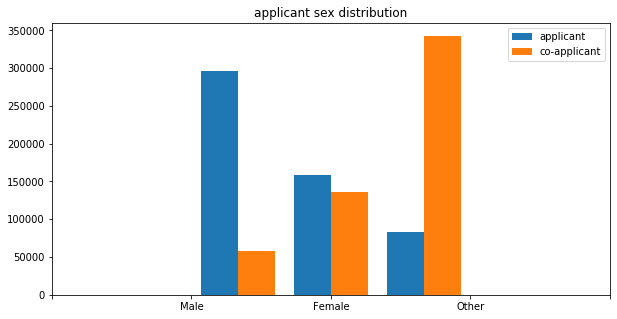

In [0]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.hist([app_sex, coapp_sex],bins=3,label=['applicant', 'co-applicant'])
plt.legend(loc='upper right') 
plt.xticks(np.arange(5), ('','Male', 'Female', 'Other',''))
plt.title('applicant sex distribution')

([<matplotlib.axis.XTick at 0x7f3b0328dc88>,
 <a list of 7 Text xticklabel objects>)

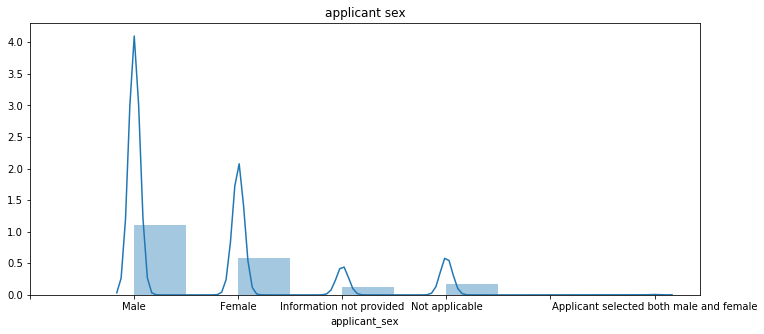

In [0]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.distplot(hmda['applicant_sex'], bins=10).set_title('applicant sex')
plt.xticks(np.arange(7), (' ', 'Male', 'Female', 'Information not provided', 'Not applicable',' ','Applicant selected both male and female'))

Text(0.5, 1.0, 'applicant age distribution')

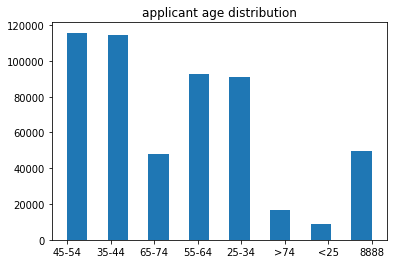

In [0]:
plt.hist(hmda['applicant_age'], bins=15)
plt.title('applicant age distribution')

([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

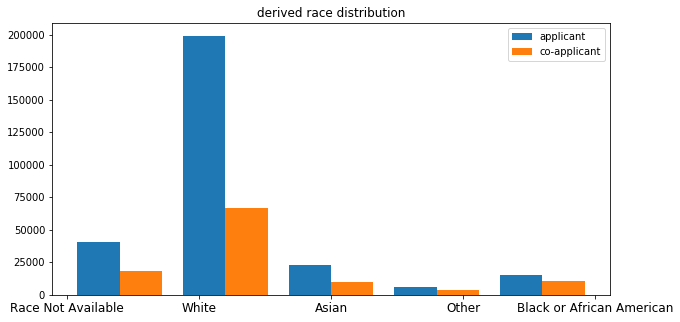

In [0]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.hist([loan_originated['derived_race'], application_denied['derived_race']],bins=5, label=['applicant', 'co-applicant'])
plt.legend(loc='upper right') 
plt.title('derived race distribution')
plt.xticks(fontsize=12)

([<matplotlib.axis.XTick at 0x7f3b02bb2a90>,
 <a list of 2 Text xticklabel objects>)

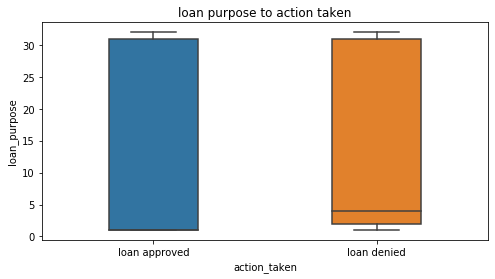

In [0]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(x=new_hmda['action_taken'],y=new_hmda['loan_purpose'], width=0.4).set_title('loan purpose to action taken')
plt.xticks(np.arange(2),('loan approved','loan denied'))

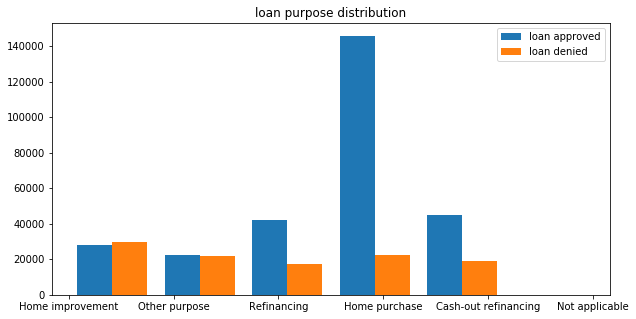

In [0]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.hist([loan_originated['loan_purpose'], application_denied['loan_purpose']], bins=6, label=['loan approved', 'loan denied'])
plt.title('loan purpose distribution')
plt.legend(loc='upper right') 
#plt.xticks(np.arange(7), ('Home purchase', 'Home improvement', '', 'Other purpose', 'Not applicable','Not applicable','Applicant selected both male and female'))

([<matplotlib.axis.XTick at 0x7fbd23d542b0>,
 <a list of 9 Text xticklabel objects>)

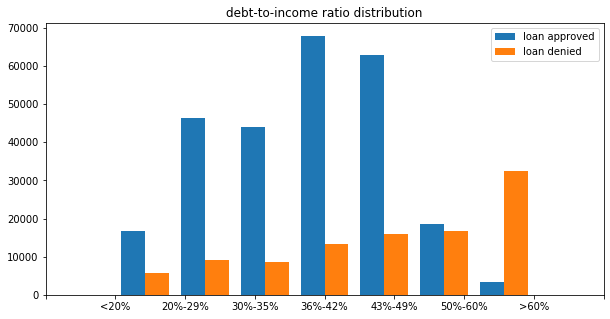

In [51]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.hist([loan_originated['debt_to_income_ratio'].dropna(),application_denied['debt_to_income_ratio'].dropna()], bins=7, label=['loan approved', 'loan denied'])
plt.title('debt-to-income ratio distribution')
plt.legend(loc='upper right')
colums_x = ['','<20%','20%-29%','30%-35%','36%-42%','43%-49%','50%-60%','>60%','']
plt.xticks(np.arange(len(colums_x)),colums_x)

([<matplotlib.axis.XTick at 0x7f3af7cc8e10>,
 <a list of 7 Text xticklabel objects>)

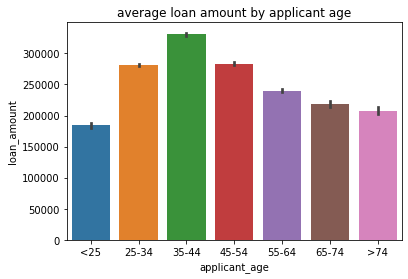

In [0]:
ax = sns.barplot(x="applicant_age", y="loan_amount", data=age2loan, estimator=mean).set_title('average loan amount by applicant age')
plt.xticks(np.arange(7), ('<25', '25-34', '35-44', '45-54', '55-64', '65-74', '>74'))

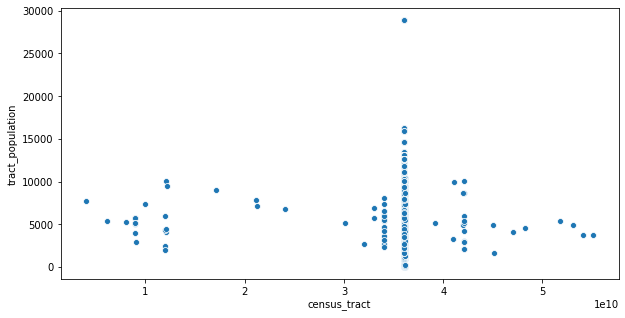

In [0]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(ax=ax, x=hmda['census_tract'], y=hmda['tract_population'])

Text(0.5, 1.0, 'tract population distribution')

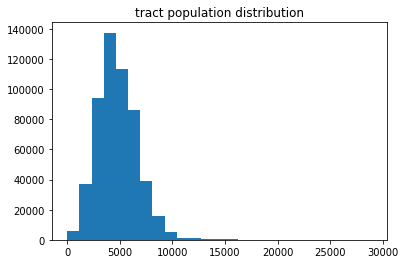

In [0]:
plt.hist(hmda['tract_population'], bins=25)
plt.title('tract population distribution')

([<matplotlib.axis.XTick at 0x7f3af79fa3c8>,
 <a list of 2 Text xticklabel objects>)

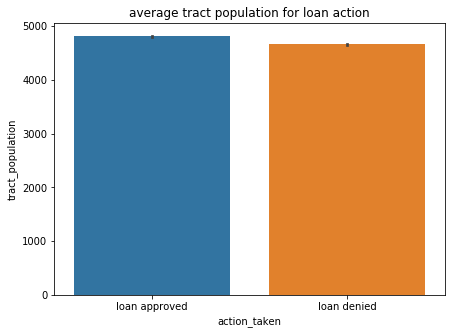

In [0]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(ax=ax, x=new_hmda['action_taken'], y=new_hmda['tract_population'], estimator=mean).set_title('average tract population for loan action')
plt.xticks(np.arange(2),('loan approved','loan denied'))

([<matplotlib.axis.XTick at 0x7f3af8088748>,
 <a list of 4 Text xticklabel objects>)

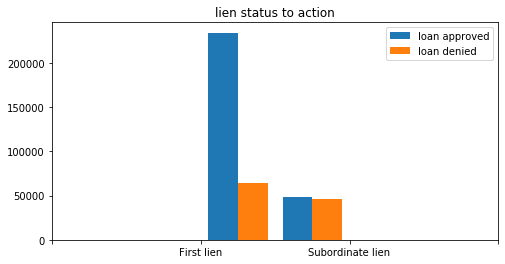

In [0]:
fig, ax = plt.subplots(figsize=(8, 4))
plt.hist([loan_originated['lien_status'],application_denied['lien_status']],bins=2, label=['loan approved', 'loan denied'])
plt.title('lien status to action')
plt.legend(loc='upper right') 
plt.xticks(np.arange(4), ('','First lien', 'Subordinate lien',''))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


([<matplotlib.axis.XTick at 0x7fe51be01e48>,
 <a list of 7 Text xticklabel objects>)

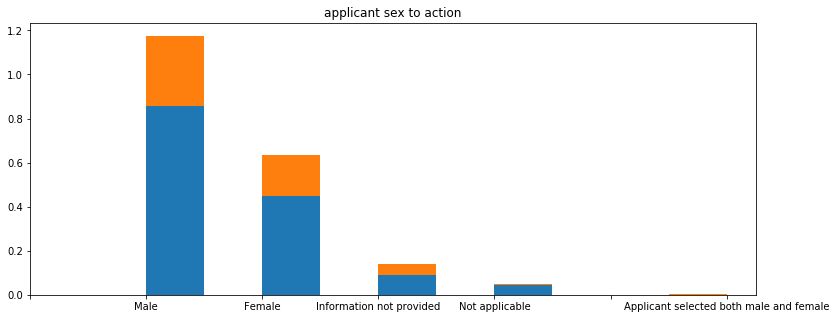

In [0]:
fig, ax = plt.subplots(figsize=(13, 5))
plt.hist([loan_originated['applicant_sex'],application_denied['applicant_sex']],bins=10, normed=True, histtype='bar', stacked=True);
plt.title('applicant sex to action')
plt.xticks(np.arange(7), (' ', 'Male', 'Female', 'Information not provided', 'Not applicable',' ','Applicant selected both male and female'))